<a href="https://colab.research.google.com/github/arad1367/WAC/blob/main/session_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Classification problem with scikit-learn
data link: https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.datasets import load_iris

from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#### 1. Explore our Iris_data

In [3]:
iris_data = load_iris()
iris_data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
# Make Iris DataFrame

iris_df = pd.DataFrame(data=iris_data['data'],
                       columns=['sepal length in cm\n', 'sepal width in cm\n', 'petal length in cm\n', 'petal width in cm'])
iris_df.tail(6)

,sepal length in cm\n,sepal width in cm\n,petal length in cm\n,petal width in cm
144,6.7,3.3,5.7,2.5
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [5]:
len(iris_df)

150

In [6]:
# Add labels to DataFrame
iris_df['label'] = iris_data['target']
iris_df.head(4)

,sepal length in cm\n,sepal width in cm\n,petal length in cm\n,petal width in cm,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0


In [7]:
iris_df['label'].value_counts()

0    50
1    50
2    50
Name: label, dtype: int64

In [8]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sepal length in cm
  150 non-null    float64
 1   sepal width in cm
   150 non-null    float64
 2   petal length in cm
  150 non-null    float64
 3   petal width in cm    150 non-null    float64
 4   label                150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [9]:
iris_df.describe()

,sepal length in cm\n,sepal width in cm\n,petal length in cm\n,petal width in cm,label
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### 2. Preprocessing step

In [10]:
# Check missing values
iris_df.isna().sum()

sepal length in cm\n    0
sepal width in cm\n     0
petal length in cm\n    0
petal width in cm       0
label                   0
dtype: int64

### 3. Make x, y

In [12]:
# Make independents variables(x), and dependent variable(y)
x = iris_df.drop('label', axis=1)
y = iris_df['label']

x[:6]
y[:10]

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: label, dtype: int64

### 4. Split data (train and test datasets)

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.3,
                                                    random_state=42)

len(x_train) == len(y_train)
len(x_test) == len(y_test)

True

### 5. Make the model

In [21]:
model = {
    'SGD': SGDClassifier(),
    'KNN': KNeighborsClassifier(),
    'RF': RandomForestClassifier()
}

model

{'SGD': SGDClassifier(),
 'KNN': KNeighborsClassifier(),
 'RF': RandomForestClassifier()}

In [24]:
SGD_model = model['SGD']
SGD_model
SGD_model.get_params() # Improve the model with hyperparameters tunning

{'alpha': 0.0001,
 'average': False,
 'class_weight': None,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.0,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'optimal',
 'loss': 'hinge',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'penalty': 'l2',
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

### 6. Fit the model

In [25]:
SGD_model.fit(x_train, y_train)

SGDClassifier()

### 7. Make some prediction

In [26]:
y_preds_SGD = SGD_model.predict(x_test)
y_preds_SGD[:10]

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1])

### 8. Score of our model

In [27]:
SGD_score = SGD_model.score(x_test, y_test)
SGD_score

1.0

### Accuracy in classification models
* accuracy_score
* confusion_matrix
* classification_report
link: https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics

### Write a function for accuracy of classification models

In [32]:
def accuracy_for_classification(y_true, y_pred, model):
  """
  This function can calculate some classification accuracy criteria.
  """
  cr = classification_report(y_true, y_pred)
  cm = confusion_matrix(y_true, y_pred)
  acs = accuracy_score(y_true, y_pred)
  result = {
      'classificationReport': cr,
      'confusionMatrix': cm,
      'AccuracyScore': acs
  }
  return result

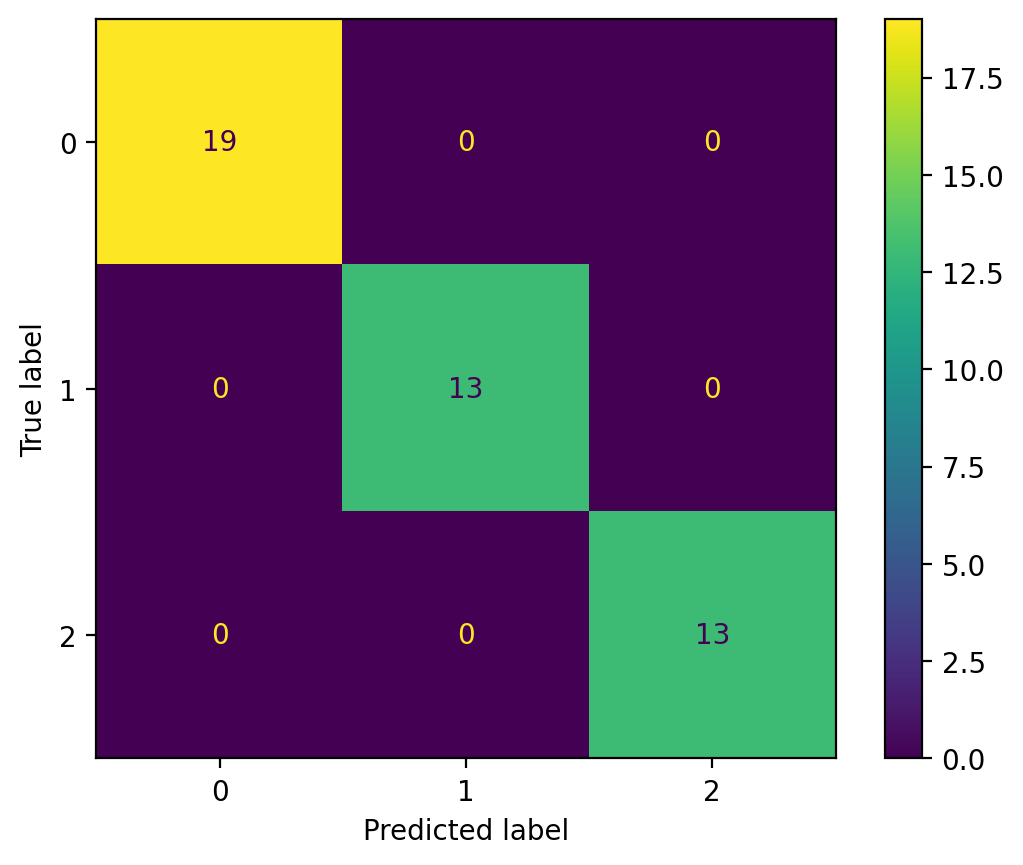

In [39]:
SGD_accuracy = accuracy_for_classification(y_test, y_preds_SGD, model['SGD'])
SGD_accuracy['AccuracyScore']
SGD_accuracy['classificationReport']
cm = confusion_matrix(y_test, y_preds_SGD, labels=SGD_model.classes_)
cm_plot = ConfusionMatrixDisplay(confusion_matrix=cm,
                                 display_labels=SGD_model.classes_)

cm_plot.plot()
plt.show();

In [40]:
model

{'SGD': SGDClassifier(),
 'KNN': KNeighborsClassifier(),
 'RF': RandomForestClassifier()}

In [44]:
### Second model

### We have data

### We have x, y

### Data is splitted

### Make model
KNN_model = KNeighborsClassifier(n_neighbors=3)
KNN_model.get_params()

### Fit the model
KNN_model.fit(x_train, y_train)

### Make some prediction
y_preds_KNN = KNN_model.predict(x_test)

### Score
KNN_score = KNN_model.score(x_test, y_test)
KNN_score

1.0

In [45]:
KNN_accuracy = accuracy_for_classification(y_test, y_preds_KNN, KNeighborsClassifier(n_neighbors=3))
KNN_accuracy['AccuracyScore']

1.0

In [46]:
model

{'SGD': SGDClassifier(),
 'KNN': KNeighborsClassifier(),
 'RF': RandomForestClassifier()}

In [49]:
### RandomForest model for classification problem

### Make model
RF_model = model['RF']
RF_model.get_params()

### Fit the model
RF_model.fit(x_train, y_train)

### Prediction
y_preds_RF = RF_model.predict(x_test)

### Score
RF_score = RF_model.score(x_test, y_test)
RF_score

1.0

In [50]:
RF_accuracy = accuracy_for_classification(y_test, y_preds_RF, model['RF'])
RF_accuracy['confusionMatrix']

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]])

### Visualisation and compare model

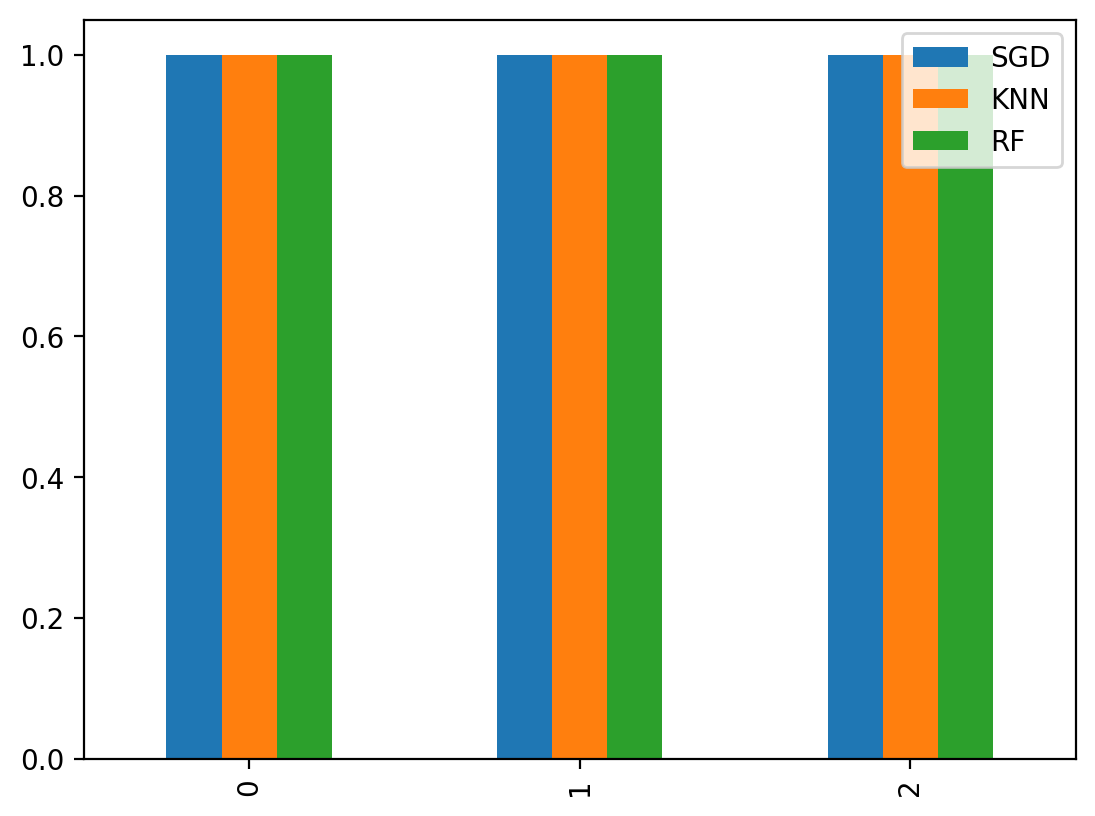

In [51]:
compare_models = {
    "SGD": SGD_score,
    "KNN": KNN_score,
    "RF" : RF_score
}

df_plot = pd.DataFrame(data=compare_models,
                       index=[0, 1, 2])

df_plot.plot.bar();

### Save this model and load this model and make a prediction with a new data